<a href="https://colab.research.google.com/github/thenameismaster/LSA/blob/master/594_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
input_path = '/content/drive/MyDrive/IPL/'

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/IPL'

 deliveries.csv  'IPL Ball-by-Ball 2008-2020.csv'   matches.csv


In [ ]:
csv_file = 'deliveries.csv'
final_file = input_path + csv_file
 
deliveries = pd.read_csv(final_file)
 
csv_file2 = 'matches.csv'
final_file2 = input_path + csv_file
 
matches = pd.read_csv(final_file2)

In [ ]:
matches.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
deliveries.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height() # here height means the height of a rectangle 
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [ ]:
Batsman_score=deliveries.groupby('batsman')["batsman_runs"].agg(sum).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Top_batsman_score= Batsman_score.iloc[:10,:]
Top_batsman_score 

,batsman,batsman_runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


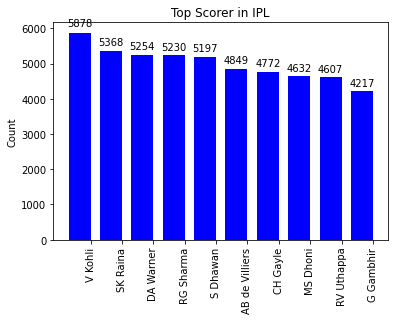

In [ ]:
labels = np.array(Top_batsman_score['batsman'])
ind = np.arange(len(labels))
width = 0.7 
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(Top_batsman_score['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Scorer in IPL")
autolabel(rects)

In [ ]:
Batsman_Ball_faced=deliveries.groupby(['batsman'])["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Batsman_Ball_faced_Top=Batsman_Ball_faced.iloc[:15,:]

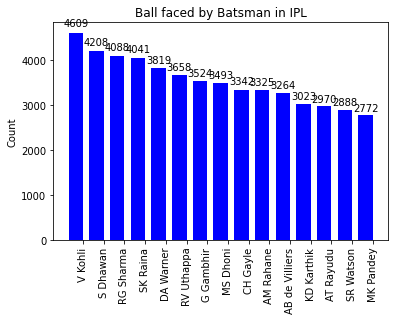

In [ ]:
labels = np.array(Batsman_Ball_faced_Top['batsman'])
ind = np.arange(len(labels))
width = 0.7 
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(Batsman_Ball_faced_Top['ball']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Ball faced by Batsman in IPL")
autolabel(rects)

In [ ]:
Batsman_strike_rate= pd.merge(Batsman_score,Batsman_Ball_faced,on="batsman",how='outer')
Batsman_strike_rate= Batsman_strike_rate[Batsman_strike_rate["batsman_runs"]>=500]
Batsman_strike_rate["strike_rate"]= (Batsman_strike_rate["batsman_runs"]/Batsman_strike_rate["ball"])*100
Batsman_strike_rate= Batsman_strike_rate[["batsman","strike_rate"]]
Batsman_strike_rate=Batsman_strike_rate.sort_values(by="strike_rate",ascending=False).reset_index(drop=True)
Batsman_strike_rate.iloc[:10,:]

,batsman,strike_rate
0,AD Russell,171.995465
1,N Pooran,161.300310
2,SP Narine,155.671902
3,CH Morris,153.055556
4,HH Pandya,150.390190
5,V Sehwag,148.827059
6,GJ Maxwell,148.568608
7,AB de Villiers,148.560049
8,RR Pant,146.822034
9,JC Buttler,144.763514


In [ ]:
Bowler_wicket = deliveries[deliveries["dismissal_kind"] != "run out"]
Bowler_wicket= Bowler_wicket[["bowler","player_dismissed"]]
Bowler_wicket = Bowler_wicket.dropna()
Bowler_wicket= Bowler_wicket.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_wicket.columns=["bowler","Wickets"]
Bowler_wicket.iloc[:10,:]

,bowler,Wickets
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,153
4,Harbhajan Singh,150
5,R Ashwin,138
6,B Kumar,136
7,SP Narine,127
8,YS Chahal,121
9,UT Yadav,119


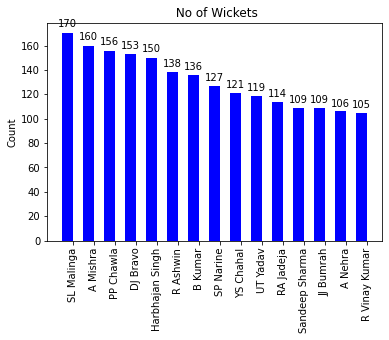

In [ ]:
Bowler_wicket_Top =Bowler_wicket.iloc[:15,:]
labels = np.array(Bowler_wicket_Top['bowler'])
ind = np.arange(len(labels))
width = 0.5 
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(Bowler_wicket_Top["Wickets"]), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical') 
ax.set_ylabel("Count")
ax.set_title(" No of Wickets")
autolabel(rects)

In [ ]:
Bowler_over= deliveries[deliveries["extra_runs"]==0][["ball","bowler"]] # here extra balls I am not considering include in over
Bowler_over= Bowler_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_over["No_of_Overs"]=(Bowler_over["ball"]/6)
Bowler_over.iloc[:20,:]

,bowler,ball,No_of_Overs
0,Harbhajan Singh,3325,554.166667
1,PP Chawla,3218,536.333333
2,R Ashwin,3186,531.000000
3,A Mishra,3128,521.333333
4,SL Malinga,2753,458.833333
5,SP Narine,2741,456.833333
6,RA Jadeja,2673,445.500000
7,DJ Bravo,2661,443.500000
8,B Kumar,2629,438.166667
9,UT Yadav,2457,409.500000


In [ ]:
Bowler_Strike_rate = pd.merge(Bowler_over,Bowler_wicket,on="bowler")
Bowler_Strike_rate= Bowler_Strike_rate[Bowler_Strike_rate["No_of_Overs"]>50] # taking only bowler with minimum 50 overs
Bowler_Strike_rate["Strike_rate"]=Bowler_Strike_rate["ball"]/Bowler_Strike_rate["Wickets"]
Bowler_Strike_rate=Bowler_Strike_rate.sort_values(by="Strike_rate").reset_index(drop=True)
Bowler_Strike_rate.iloc[:20,:]

,bowler,ball,No_of_Overs,Wickets,Strike_rate
0,K Rabada,787,131.166667,61,12.901639
1,KK Ahmed,373,62.166667,28,13.321429
2,CR Woakes,365,60.833333,25,14.600000
3,DE Bollinger,560,93.333333,38,14.736842
4,MF Maharoof,408,68.000000,27,15.111111
5,AJ Tye,605,100.833333,40,15.125000
6,MR Marsh,313,52.166667,20,15.650000
7,VY Mahesh,332,55.333333,21,15.809524
8,AD Mascarenhas,302,50.333333,19,15.894737
9,Imran Tahir,1278,213.000000,80,15.975000


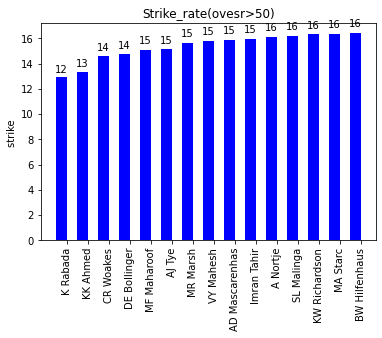

In [ ]:
Bowler_Strike_rate_Top = Bowler_Strike_rate.iloc[:15,:]
labels = np.array(Bowler_Strike_rate_Top['bowler'])
ind = np.arange(len(labels))
width = 0.5 
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(Bowler_Strike_rate_Top ["Strike_rate"]), width=width, color='blue')
ax.set_xticks(ind+((width)/2.)) 
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("strike ")
ax.set_title("Strike_rate(ovesr>50)")
autolabel(rects)

Q. Which bowler has the best strike rate in IPLs


Answer.
**Kagiso RABADA**

